# GLM via SKLearn

Please email: Joshua_Zimmer@hms.harvard.edu with questions

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('./backend')

import sglm
import sglm_cv
import sklearn.linear_model
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np

# Normal (OLS)

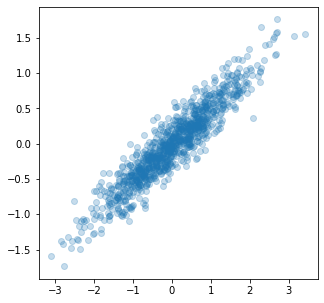

In [3]:
norm = stats.norm()

true_x = norm.rvs(size=1000)
true_y = true_x * 0.5
obs_y = (true_y + norm.rvs(size=1000)*0.2)

x = true_x[:,None]
y = obs_y

plt.figure(figsize=(5,5))
plt.scatter(x, y, alpha = 0.25)

In [4]:
# glm = sglm.GLM('Normal')
# glm = sklearn.linear_model.LinearRegression()
glm = sglm.GLM('Normal', alpha=0)
glm.fit(x, y)
coef, intercept = glm.coef_, glm.intercept_
coef, intercept

(array([0.45970211]), -0.00972436316604181)

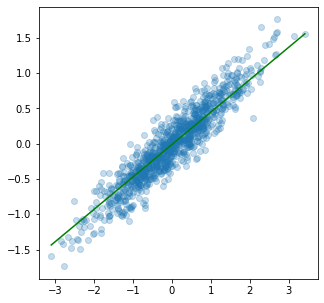

In [5]:
view_x = np.linspace(x.min(), x.max(), num=100)
view_y = view_x*coef + intercept
obs_y = (true_y + norm.rvs(size=1000)*0.)

plt.figure(figsize=(5,5))
plt.scatter(x[:,0], y, alpha = 0.25)
plt.plot(view_x, np.squeeze(view_y), color='g')

# Poisson

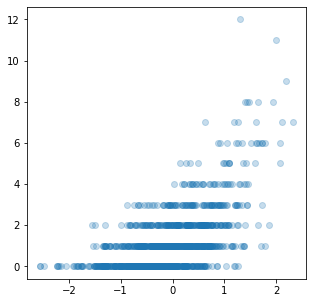

In [6]:
true_x = np.array(sorted(norm.rvs(size=1000)*.75))
true_y = np.exp(true_x)
obs_y = np.array([stats.poisson(mu=np.exp(_)).rvs(1) for _ in true_x]).reshape(-1)

x = true_x[:,None]
y = obs_y

plt.figure(figsize=(5,5))
plt.scatter(x, y, alpha = 0.25)

In [7]:
# glm = sglm.GLM('Poisson', alpha=0, link='identity')
glm = sglm.GLM('Poisson', reg_lambda=0)
glm.fit(x, y)
coef, intercept = glm.coef_, glm.intercept_
coef, intercept

(array([0.93743427]), 0.027340592350090072)

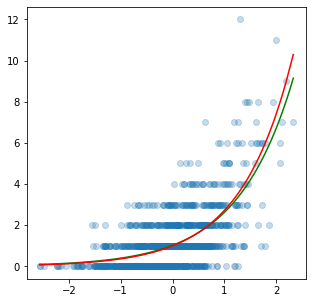

In [8]:
view_x = np.linspace(x.min(), x.max(), num=100)
view_y = np.exp(view_x*coef + intercept)
# view_y = view_x*coef + intercept

plt.figure(figsize=(5,5))
plt.scatter(x[:,0], y, alpha = 0.25)
plt.plot(view_x, np.squeeze(view_y), color='g')
plt.plot(true_x, np.squeeze(true_y), color='r')

# Logistic

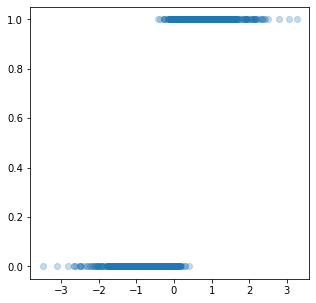

In [9]:
norm = stats.norm()

true_x = norm.rvs(size=1000)
true_y = true_x * 0.5
obs_y = ((true_y + norm.rvs(size=1000)*0.1) > 0)*1.0

x = true_x[:,None]
y = obs_y

plt.figure(figsize=(5,5))
plt.scatter(x, y, alpha = 0.25)

In [10]:
glm = sglm.GLM('Logistic', reg_lambda=0)
glm.fit(x, y)
coef, intercept = glm.coef_, glm.intercept_
coef, intercept

/Users/josh/opt/anaconda3/lib/python3.8/site-packages/pyglmnet/pyglmnet.py:863: UserWarning: Reached max number of iterations without convergence.
  warnings.warn(


(array([6.14475463]), -0.04274193975851452)

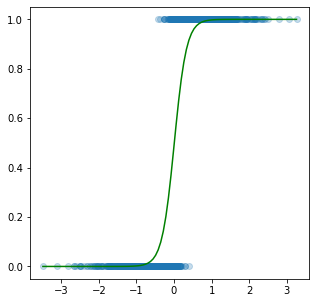

In [11]:
view_x = np.linspace(x.min(), x.max(), num=100)
view_y = 1/(1+np.exp(-(view_x*coef + intercept)))

plt.figure(figsize=(5,5))
plt.scatter(x[:,0], y, alpha = 0.25)
plt.plot(view_x, np.squeeze(view_y), color='g')

# Normal (OLS) - CV

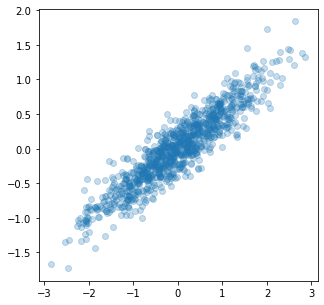

In [12]:
norm = stats.norm()

true_x = norm.rvs(size=1000)
true_y = true_x * 0.5
obs_y = (true_y + norm.rvs(size=1000)*0.2)

x = true_x[:,None]
y = obs_y

plt.figure(figsize=(5,5))
plt.scatter(x, y, alpha = 0.25)

In [13]:
import sklearn.model_selection

ss = sklearn.model_selection.ShuffleSplit()

In [14]:
# for sss in ss.split(x, y):
#     for isss in sss:
#         print(isss.shape)
#     break

inx = list(ss.split(x, y))

In [15]:
inx

[(array([669,  49, 422, 980, 834, 154, 427, 330,  88, 374, 415, 541,  67,
          47, 344,  90, 129, 514, 108, 727, 223, 612, 549, 844, 904, 181,
         298, 524, 118, 282, 654, 420, 306, 728, 786, 700, 726, 683, 437,
         691, 880, 626, 476, 504, 807, 583, 765, 291,  87, 924, 474, 664,
         443, 322, 189,  72, 745, 977, 434, 847, 892, 631, 106, 918, 822,
         367, 191, 284, 941, 168, 261, 601, 156, 907, 301, 902, 491, 870,
         484, 896, 766, 841, 515, 139,  39, 237, 269, 755,  18, 187, 311,
         911, 592, 389, 558, 561, 138,   1, 842, 823, 702, 929, 343, 412,
          94, 425, 829, 692, 329, 984, 356, 587,  54, 800, 209, 529, 920,
         771, 140, 428, 663, 401, 876,   8, 495, 266, 777, 171, 974, 277,
          62, 252, 313, 173,  81, 863, 320, 835,  68, 709, 773, 390, 478,
          27, 468, 317, 958, 124, 290, 768, 207, 406, 102, 938,  53, 720,
         862, 382, 580, 510, 111, 582, 994, 910, 453, 821, 746, 671, 993,
         205,  51, 469, 694, 770, 531,

In [16]:

# glm = sglm.GLM('Normal', alpha=0)
# glm.fit(x, y)

sglm_cv.cv_glm_single_params(x, y, inx, 'Gaussian', {'alpha': 0})



(array([[0.45669201, 0.45951994, 0.45533103, 0.45359276, 0.45287191,
         0.45614979, 0.45352604, 0.4501549 , 0.45262864, 0.45368534]]),
 array([0.0074129 , 0.01205597, 0.00875879, 0.00639879, 0.00964721,
        0.00778884, 0.00637665, 0.00856154, 0.00881198, 0.00769707]),
 array([38.99757524, 39.40759301, 39.51494078, 40.00877428, 39.38228408,
        38.92042683, 38.63464861, 39.53057009, 38.45335784, 39.03632455]),
 array([4.55054752, 3.90362972, 4.15014169, 3.8239581 , 4.50922135,
        4.67392828, 5.2044326 , 4.62528354, 5.46145113, 4.78170936]))

In [17]:

param_list = sglm_cv.generate_mult_params(
                                          {
                                           'alpha': [0,0.01,0.1,1],
                                           'roll': [0,1,2,3,4]
                                          },
                                          kwargs={'fit_intercept': True}
                                         )



In [18]:
param_list

[{'fit_intercept': True, 'alpha': 0, 'roll': 0},
 {'fit_intercept': True, 'alpha': 0, 'roll': 1},
 {'fit_intercept': True, 'alpha': 0, 'roll': 2},
 {'fit_intercept': True, 'alpha': 0, 'roll': 3},
 {'fit_intercept': True, 'alpha': 0, 'roll': 4},
 {'fit_intercept': True, 'alpha': 0.01, 'roll': 0},
 {'fit_intercept': True, 'alpha': 0.01, 'roll': 1},
 {'fit_intercept': True, 'alpha': 0.01, 'roll': 2},
 {'fit_intercept': True, 'alpha': 0.01, 'roll': 3},
 {'fit_intercept': True, 'alpha': 0.01, 'roll': 4},
 {'fit_intercept': True, 'alpha': 0.1, 'roll': 0},
 {'fit_intercept': True, 'alpha': 0.1, 'roll': 1},
 {'fit_intercept': True, 'alpha': 0.1, 'roll': 2},
 {'fit_intercept': True, 'alpha': 0.1, 'roll': 3},
 {'fit_intercept': True, 'alpha': 0.1, 'roll': 4},
 {'fit_intercept': True, 'alpha': 1, 'roll': 0},
 {'fit_intercept': True, 'alpha': 1, 'roll': 1},
 {'fit_intercept': True, 'alpha': 1, 'roll': 2},
 {'fit_intercept': True, 'alpha': 1, 'roll': 3},
 {'fit_intercept': True, 'alpha': 1, 'roll':

In [19]:
sglm_cv.cv_glm_mult_params(x, y, inx, 'Gaussian', param_list)

[(array([[0.45669201, 0.45951994, 0.45533103, 0.45359276, 0.45287191,
          0.45614979, 0.45352604, 0.4501549 , 0.45262864, 0.45368534]]),
  array([0.0074129 , 0.01205597, 0.00875879, 0.00639879, 0.00964721,
         0.00778884, 0.00637665, 0.00856154, 0.00881198, 0.00769707]),
  array([38.99757524, 39.40759301, 39.51494078, 40.00877428, 39.38228408,
         38.92042683, 38.63464861, 39.53057009, 38.45335784, 39.03632455]),
  array([4.55054752, 3.90362972, 4.15014169, 3.8239581 , 4.50922135,
         4.67392828, 5.2044326 , 4.62528354, 5.46145113, 4.78170936])),
 (array([[ 0.00328281,  0.00316857,  0.00197127, -0.00430298,  0.0075126 ,
           0.00647917,  0.01019443,  0.0020989 ,  0.0034403 ,  0.01079237]]),
  array([ 0.0077534 ,  0.01007435,  0.00701967,  0.00828621,  0.00409938,
         -0.00324497,  0.00656256, -0.00064822,  0.00321353, -0.0010186 ]),
  array([249.87116633, 249.64481336, 251.48001729, 244.39730581,
         248.47462645, 247.5089104 , 249.41391855, 250.823